In [4]:
import torch
import torchvision
from torchvision import transforms, datasets

In [5]:
train = datasets.MNIST("", train = True, download=True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train = False, download=True, transform = transforms.Compose([transforms.ToTensor()]))

Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw


Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw





Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw
Processing...
Done!


In [6]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

In [13]:
import torch.optim as optim

net = Net()

optimizer = optim.Adam(net.parameters(), lr = 0.001)  # Adam's Algorithm
epochs = 3

for i in range(epochs):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()   # Backpropagation
        optimizer.step()  # Adjusts the weights
    print(loss)

tensor(0.0557, grad_fn=<NllLossBackward>)
tensor(0.0044, grad_fn=<NllLossBackward>)
tensor(0.0015, grad_fn=<NllLossBackward>)


In [18]:
correct_train = 0
total_train = 0
correct_test = 0
total_test = 0
with torch.no_grad():
    net.eval()
    for data in trainset:
        X, y = data  
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if(torch.argmax(i) == y[idx]):
                correct_train+= 1
            total_train+= 1

with torch.no_grad():
    net.eval()
    for data in testset:
        X, y = data  
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if(torch.argmax(i) == y[idx]):
                correct_test+= 1
            total_test+= 1

print('Accuracy of train:', round(correct_train/total_train, 3))
print('Accuracy of test:', round(correct_test/total_test, 3))

Accuracy of train: 0.976
Accuracy of test: 0.964


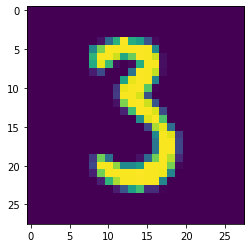

In [25]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))

In [26]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(3)
